## Compulsory Task 1 Titanic exploratory analysis


### Questions to explore
- What is the most important factor in determining survival of the Titanic incident?
- In the movie, the upper-class passengers were given preference on lifeboats. Does this show in the data?
- "Woman and children first". Was this the case?
- Add one other observation that you have noted in the dataset.

In [58]:
# load packages
import pandas as pd
import numpy as np

from scipy import stats
# for min_max scalling
from mlxtend.preprocessing import minmax_scaling

# plotting modules
import seaborn as sns
import missingno
import matplotlib.pyplot as plt

In [59]:
# read data file
tdata = pd.read_csv("Titanic.csv")
tdata.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


__Data dictionary:__ 
- PassengerId: Unique ID of a passenger
- Pclass: ticket class, 1 = 1st/upper, 2 = 2nd/middle, 3 = 3rd/lower
- Age: age in years
- SibSp: # of siblings/spouses aboard the Titanic
- Parch: # of parents/children aboard the Titanic
- Ticket: ticket number
- Fare: Passenger fare
- Cabin: cabin number
- Embarked: Port of embarkation, C = Cherbourg, Q = Queenstown, S = Southampton

In [60]:
# quick check at data types & null counts
tdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


_From the above, the dataset is a combination of numeric data and categorical data_ 
1. The 'Embarked' feature has only 2 missing values, these records can be dropped_
2. The 'Age' feature has 891-714 = 177 missing values, this can be filled with its mean value
3. The 'Cabin' feature has 891-204 = 687 missing values, which looks like a lot. For this exploratory practise, this series is dropped.

In [61]:
# drop null data for 'Embarked'
tdata = tdata.dropna(subset = ['Embarked'])

In [62]:
# fill 'Age' null values with the mean
tdata['Age'].fillna(tdata['Age'].mean(), inplace = True)

In [63]:
# drop 'Cabin' column
tdata = tdata.drop('Cabin', axis = 1)
tdata.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [65]:
# double check current missing value
tdata.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [64]:
# further understanding of numeric data in the dataset of their ranges, etc.
tdata.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,29.642093,0.524184,0.382452,32.096681
std,256.998173,0.486260,0.834700,12.968346,1.103705,0.806761,49.697504
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,446.000000,0.000000,3.000000,29.642093,0.000000,0.000000,14.454200
75%,668.000000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [66]:
# separate numeric columns and catagorical for analysis
tdata_num = tdata[['Age', 'SibSp', 'Parch', 'Fare']]
tdata_cat = tdata[['Survived', 'Pclass', 'Sex', 'Ticket', 'Embarked']]

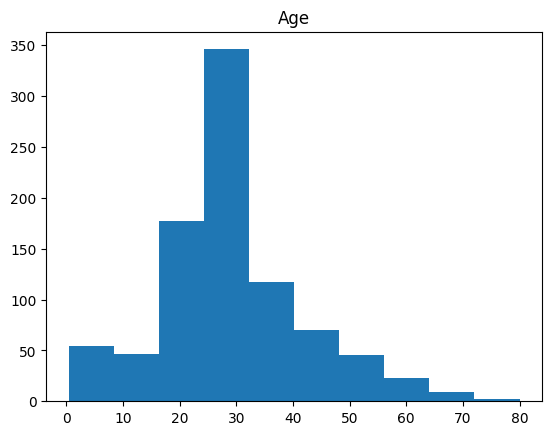

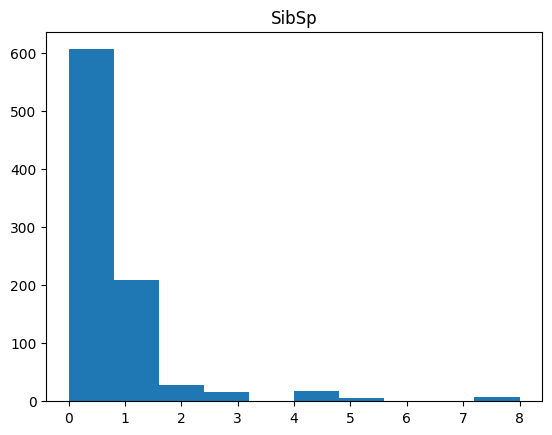

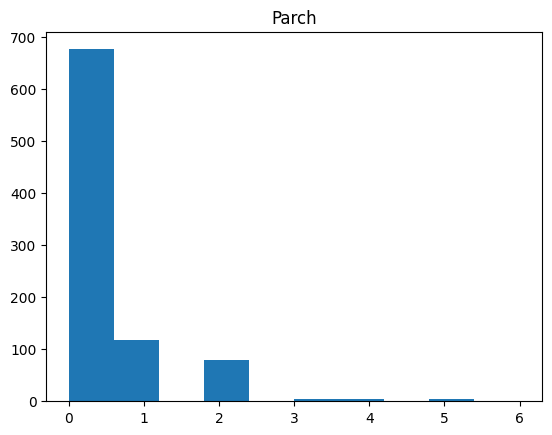

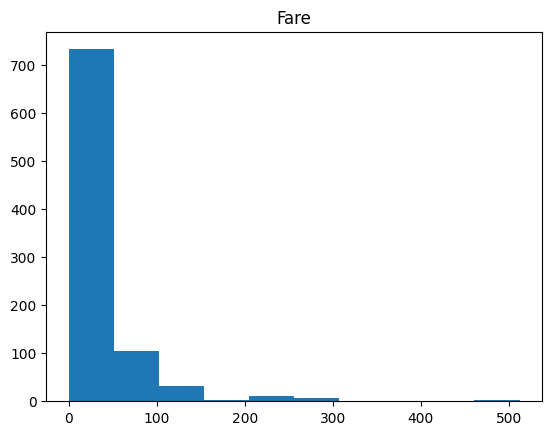

In [67]:
# check distributions of numeric variables

for item in tdata_num.columns:
    plt.hist(tdata_num[item], )
    plt.title(item)
    plt.show()

In [68]:
# check relationships of 'Survival' with numeric variables
pd.pivot_table(tdata, index = 'Survived', values = ['Age', 'SibSp', 'Parch', 'Fare']) 

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.402116,22.117887,0.329690,0.553734
1,28.414879,48.209498,0.467647,0.476471


_It can be seen from above graphs and Table that:_
1. Average age of 'Survival' is higher than not 'Survival', so younger people seem to survive more, 28.3 vs 30.6
2. People who purchased higher fare values seem to be more likely to survive, 48.40 vs 22.12, nearly doubled the chance
3. People with parents/Children seem to high slightly higher chance to survive, 0.46 vs 0.33
4. People with 'SibSp' siblings seem to high slightly lower chance to survive, 0.47 vs 0.55

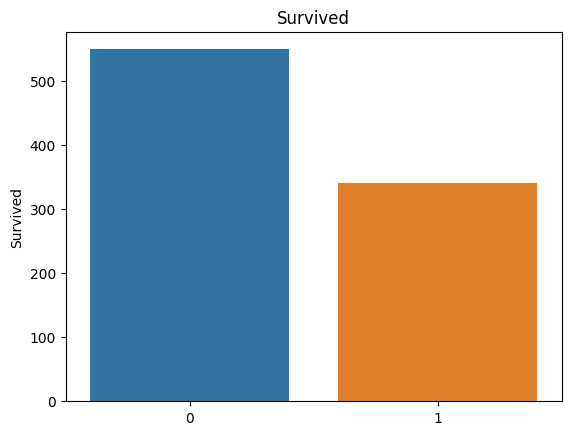

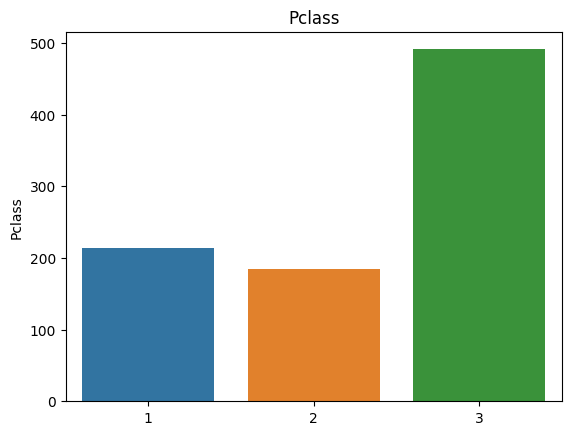

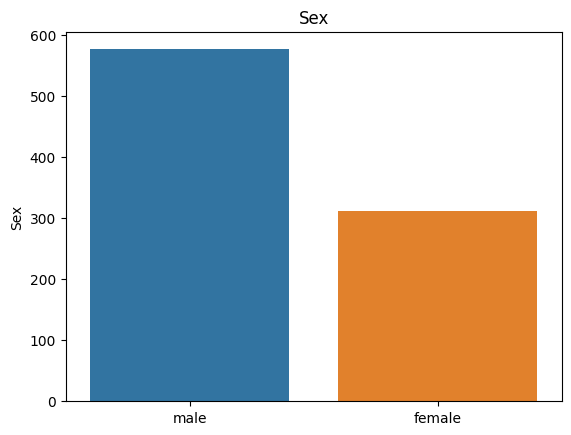

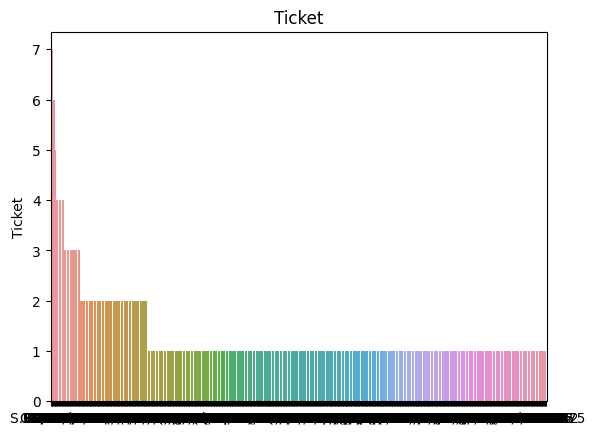

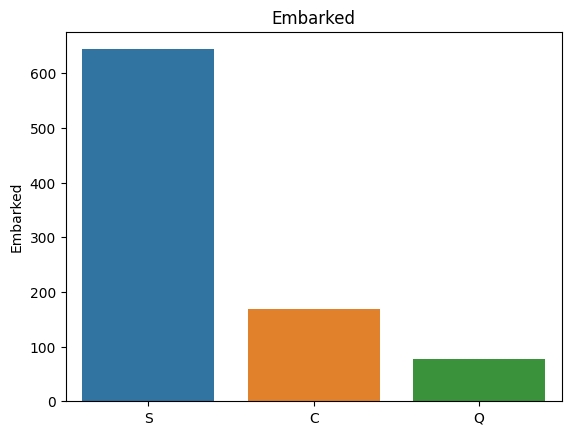

In [74]:
# check distributions of categorical variables

for item in tdata_cat.columns:
    sns.barplot(x = tdata_cat[item].value_counts().index, y = tdata_cat[item].value_counts(), data = tdata_cat)
    plt.title(item)
    plt.show()

_It can be seen from above graphs that:_
1. Total 'Survived' is slightly more than 300 people
2. 'Pclsss' type 3 seem to have the highest value, means majority people travel with 3rd class
3. 'Sex' more males were travelling than woman
4. 'Ticket' seems very scattered, but generally it can be told that most people travel with 1 ticket, and only minority people had multi-tickets
5. 'Embarked' Majority people boarded from Southampton

In [85]:
# check relationships of categorical variables with 'Survival'
Pclass_table = pd.pivot_table (tdata_cat, index = 'Survived', columns = 'Pclass', values = 'Ticket', aggfunc = ['count'])
Sex_table = pd.pivot_table (tdata_cat, index = 'Survived', columns = 'Sex', values = 'Ticket', aggfunc = ['count'])
Embarked_table = pd.pivot_table (tdata_cat, index = 'Survived', columns = 'Embarked', values = 'Ticket', aggfunc = ['count'])
print(Pclass_table)
print(Sex_table)
print(Embarked_table)

         count         
Pclass       1   2    3
Survived               
0           80  97  372
1          134  87  119
          count     
Sex      female male
Survived            
0            81  468
1           231  109
         count         
Embarked     C   Q    S
Survived               
0           75  47  427
1           93  30  217


_It can be seen from above table that:_
1. 'Pclass': more people survived from Pclass_class 1, compared with class 2 and class 3. Therefore, it is likely that richer people had higher survival rate.
2. 'Sex': More female survived than male. Therefore, it can be likely that 'Woman and children first' can be true.
3. 'Embarked': The location where people boarded does not seem to have very apparent influence on the survived number

### Answers
- What is the most important factor in determining survival of the Titanic incident?
  - From above analysis, the most important factor seem to be: Pclass, Sex, Age, Fair, Parch
- In the movie, the upper-class passengers were given preference on lifeboats. Does this show in the data?
  - This seems to be true from the data, as more people survived from Pclass_class 1 and more expensive Fare price.
- "Woman and children first". Was this the case?
  - This seems to be the case. As more females survived than male and from Parch people with family/children have higher chance to survive than those without.  
- Add one other observation that you have noted in the dataset.
  - There are other observations were also noted in the dataset. Such as from Average age of 'Survival', it seems that younger people seem to survive more, 28.3 vs 30.6. The location where people boarded does not seem to have very apparent influence on the survived number from analysis on 'Embarked' feature.
